# Algorithms

An algorithm is the name we give to the step-by-step recipe we use to solve a problem. It is different from code. An algorithm is an idea, code is an implementation of the idea.

In computer science, a course in algorithms generally consists of algorithms related to foundational ideas: search, sorting and other topics.

Here is a very popular book on algorithms - notice the table of contents

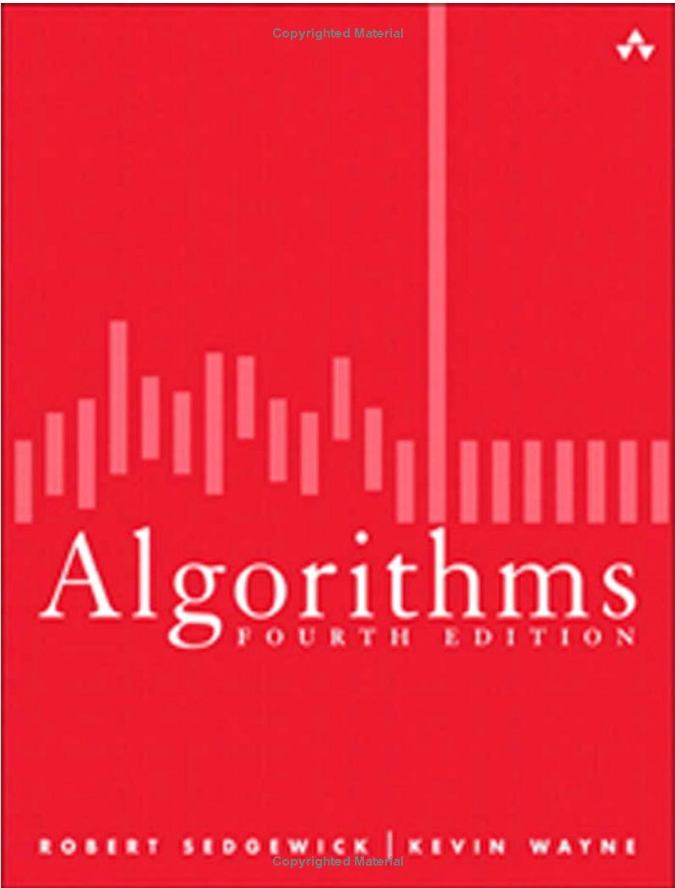
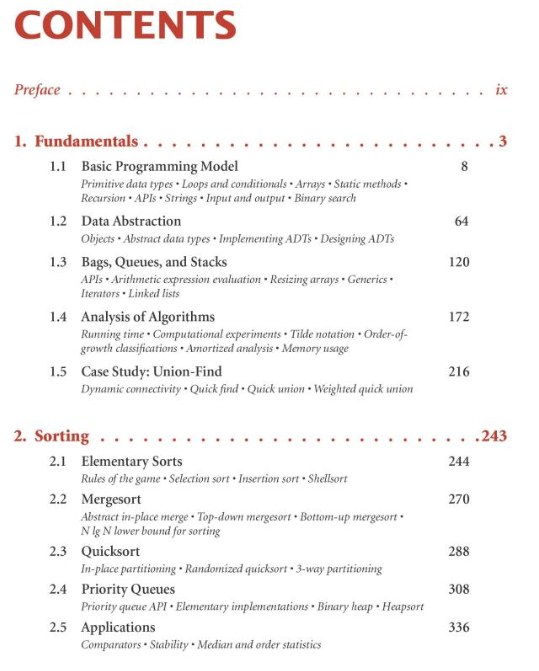
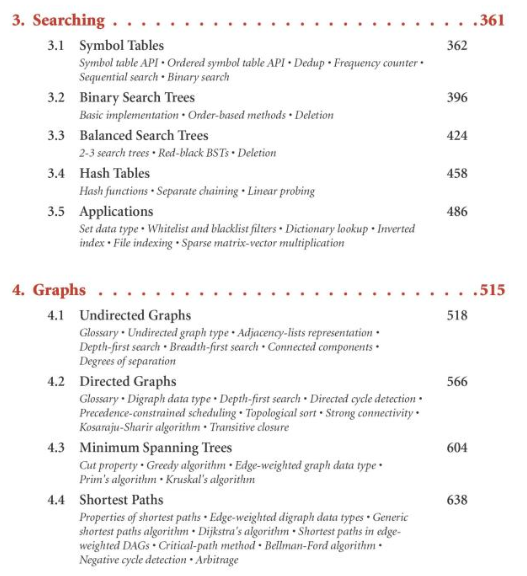
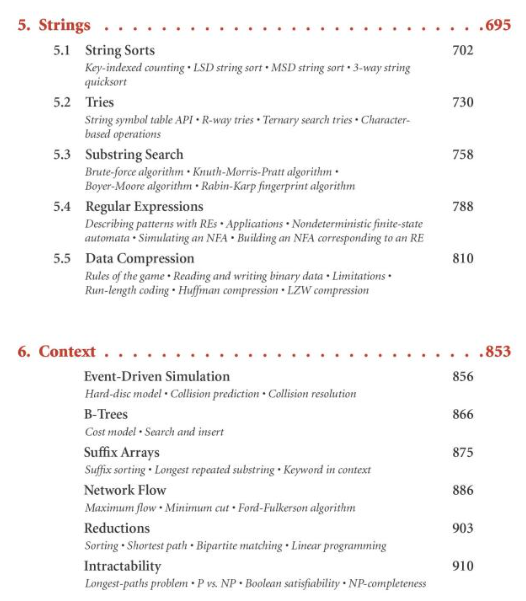

As data scientists, we don't need to learn the detail of how search or sorting is implemented. However, we do need to appreciate that there are different methods of doing so and the general idea of comparing the complexity of various algorithms.

In [ ]:
import random

#### Bubble sort

In [ ]:
random_list = [random.randint(0, 100) for _ in range(10)]
random_list

In [ ]:
def bubble_sort(arr):
    # source: https://www.geeksforgeeks.org/python-program-for-bubble-sort/
  
    for n in range(len(arr) - 1, 0, -1):
        swapped = False  
        for i in range(n):
            if arr[i] > arr[i + 1]:
                arr[i], arr[i + 1] = arr[i + 1], arr[i]
                swapped = True
        if not swapped:
            break

In [ ]:
bubble_sort(random_list)

In [ ]:
random_list

#### Quick sort

In [ ]:
random_list = [random.randint(0, 100) for _ in range(10)]
random_list

In [ ]:
from random import randint

def quicksort(array):
    # https://realpython.com/sorting-algorithms-python/#the-quicksort-algorithm-in-python
    if len(array) < 2:
        return array

    low, same, high = [], [], []
    pivot = array[randint(0, len(array) - 1)]

    for item in array:
        if item < pivot:
            low.append(item)
        elif item == pivot:
            same.append(item)
        elif item > pivot:
            high.append(item)
    return quicksort(low) + same + quicksort(high)

In [ ]:
random_list = quicksort(random_list)

In [ ]:
random_list

### Why do we need to study different types of sorting alorithms?
Isn't one enough?

In [ ]:
SIZE_OF_LIST = 1_000

%time _ = bubble_sort([random.randint(0, 100) for _ in range(SIZE_OF_LIST)])

%time _ = quicksort([random.randint(0, 100)   for _ in range(SIZE_OF_LIST)])

Quick sort is MUCH faster! But what we care about even more is how these algorithms scale

In [ ]:
import time
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
%%time
times = list()
for o in [10, 50, 100, 500, 1_000, 5_000, 10_000, 50_000]:
    bubble_start = time.perf_counter()
    bubble_sort([random.randint(0, 100) for _ in range(o)])
    bubble_dur = time.perf_counter() - bubble_start
    
    quick_start = time.perf_counter()
    quicksort([random.randint(0, 100)   for _ in range(o)])
    quick_dur = time.perf_counter() - quick_start

    times.append((o, bubble_dur, quick_dur))

In [ ]:
times

In [ ]:
times_df = pd.DataFrame(times, columns=['size', 'bubble_sec', 'quick_sec'])
times_df

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(times_df['size'], times_df['bubble_sec'], marker='o', label='Bubble Sort')
plt.plot(times_df['size'], times_df['quick_sec'], marker='s', label='QuickSort')

# Formatting
plt.xscale('log')  # Log scale makes trends clearer
plt.yscale('log')  # Log scale to compare growth rates
plt.xlabel('Input Size')
plt.ylabel('Time (seconds)')
plt.title('Sorting Algorithm Performance')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

Not only is quicksort better, as we increase the data, the performance difference becomes greater! In other words, in terms of "time complexity," these two algorithms are in different categories.

See this video for a visual comparison of run-times: https://www.youtube.com/watch?v=ZZuD6iUe3Pc

### Search algorithms

Search also serves as a great way to study intuitive algorithms in a more formal manner. Let's take a look at two common algorithms: linear search and binary search.

#### Linear search
As the name implies, linear search simply means, starting with the first element, and iterating through a list until the item of interest is found

In [ ]:
def linear_search(arr, target):
    for i in range(len(arr)):
        if arr[i] == target:
            return i  # Return the index of the target
    return -1  # Return -1 if not found

In [ ]:
arr = [100, 10, 20, 30, 40, 50]
target = 30
print(linear_search(arr, target))  # Output: 2

#### Binary search
If we can make some assumptions about our data, we may be able to _dramatically_ reduce search time. In this case, if we can be sure that the data is sorted, we can optimize this algorithm - simply check the middle of the range, the number will be either higher or lower than the target (if you found the match, you are done). This way, you can directly eliminate hald the list!

In [ ]:
def binary_search_recursive(arr, target, left, right):
    # source: ChatGPT
    if left > right:
        return -1  # Base case: Not found
    
    mid = (left + right) // 2
    
    if arr[mid] == target:
        return mid  # Found target
    elif arr[mid] < target:
        return binary_search_recursive(arr, target, mid + 1, right)  # Search right
    else:
        return binary_search_recursive(arr, target, left, mid - 1)  # Search left


In [ ]:
arr = [10, 20, 30, 40, 50]
target = 30
print(binary_search_recursive(arr, target, 0, len(arr) - 1))  # Output: 2


Note that more realistically, you wouldn't search for a number. You are more likely to search records, such as `[("Homer", 36, 23424), ("Marge", 34, 54345), ...]` where the algorithm looks for one property and returning the object which contains that property.

### Categories of complexities: best, worst, average cases

Even without running timers, I'm sure you can see that the linear algorithm will be slower, particularly for large lists. However, let's tackle another complexity: _what if the element we are searching for is the first element in the list_?

If the element you want is the first oen in the list, the linear algorithm will find it right away! The binary search algorithm will actually take a number of steps before finding it. 

In other words, algorithm complexity isn't just measure across algorithms, we have to take into account _best, average and worst case_ scenarios.

### Categories of complexities: O(1), O(n), O(n * log n), O(log n), O(n**2), O(2 ** n)
In computer science, we often don't care about marginal improvements or differences in performance. We care when something is better in _orders of magnitude_ (10 or 100 times better). The notation of complexity is called the "Big O" notation and looks like this **O(xyz)**, technically called the "order of approximation"

#### O(1) - Constant time (operations don't depend on input size)
Recall our example from above: while searching, if the item is the first one in the list, we are already done! In the best case scenario, linear search has the complexity of O(1). It doesn't get any better than this!

Recall from our data structures lecture that arrays and lists, in academic language, are two different data structures. An array is a group of values that are next to each other in memory (contiguous). If we want to get the 32nd item, we jump to `start location + 32nd location`. If we want to get the 1000th item, the number of steps is exactly the same: `start location + 1000 location`!

On the other hand, for (linked) lists, getting item number 32 and item number 1000 require us to traverse ALL the items until we get to the target - hence the computation depends on the item we are looking for.

#### O(log n) - Logarithmic time (faster than linear time)
Recall the binary search algorithm. If we double the size of the list, the number of operations does _not_ double:

Let's find the number `10` in the list `[1, 3, 5, 9, 10, 12, 15, 16, 17, 19]`. We jump to the middle, split the list in half, then jump to the middle again, etc:
1. [1, 3, 5, 9, 10] and [12, 15, 16, 17, 19]
2. [1, 3] and [9, 10]
3. 10! <= took about 3 steps

Let's do the same thing with a list twice as large. Find 1200 in the list `[1, 3, 5, 9, 10, 12, 15, 16, 17, 19, 100, 300, 500, 900, 1000, 1200, 1005, 1600, 1700, 1900]`
1. [1, 3, 5, 9, 10, 12, 15, 16, 17, 19] and [ 100, 300, 500, 900, 1000, 1200, 1005, 1600, 1700, 1900]
2. [ 100, 300, 500, 900, 1000] and [1200, 1005, 1600, 1700, 1900]
3. [1200, 1005] and [1600, 1700, 1900]
4. 1200! <= took about 4 steps

A _great_ heuristic to remember this complexity is, _are you employing a divide and conquer_ strategy to solve this?

#### O(n) - Linear time (complexity is proportional to the input size)
Perhaps the easiest to understand: think of linear search. On the everage case, the size of the input corresponds to about how long it will take to find an element. A good heuristic is that this algorithm will involve a single loop over the data.

#### O(n log on) - Quasilinear time (slow than linear time)
Just think of this as being between linear time and quadratic time

#### O(n**2) - Quadratic time (pay attention to computation time)
As the input size doubles, the time it takes to process the data will incerase by its square! This is when we start to get into compute constraints. A good example of this type of algorithm is k-nearest neighbor (at least the naive version). Double the points under consideration will NOT double the compute time, it will increase it significantly more.

A great heuristic for this type of algorithm is to look for loops inside loops. If your code is running slow, improving this algorithm is likely to bear more fruit than trying to optimize algorithms with lower complexity.

#### O(2**n) - Exponential time (subsets and combinations)
First, note that, in common parlance, "exponential" often means `n**2`. For us, `n**2` is quadratic and `2**n` is exponential.

Imagine you have a dataset with 2 features. You can choise to use features 1, feature 2 or both. Another way to phrase this is to say: for each choice, you can either chose to include it or not. For two features, you have 2 * 2 options. 

If you have three features, you again have two options per feature: include, don't include. So 2 * 2 * 2. 

This can generally be stated as 2**n, where n is the number of features or 'input size'. Notice that if you add a single additional feature, the number of choices double (you are multiplying existing choices by 2). 

A more general way to state this is that the calculation to generate all subsets of a set or all combinations of a set have complexity of O(2**n).

With only 30 features, you will have to check over a billion subsets. This category of algorithms become "intractable" very quickly - in other words, for large input sizes, these algorithms mmay be _pratically_ (but not theoretically) impossible. 

#### (n!) - Factorial time (permutations)
If you have a problem which not only requires generation of all combinations, but additinoally preserves order (hence permutations), you have a factorial time problem. With input size of only 13 inputs us well over a billion calculations.

### Futher notes

Please note that these categories are not exhaustive. Practical analysis of algorithms is much more involved. What is shown here is just an intorductory level sktech of algoritm complexity.

For example, K-Means can be thought to have complexity of O(n * k * i) where n is the number of points, k is the number of clusters and i is the number of iterations. 

Additonally, we have only seen complexity as it relatese to computation. A related topic is space complexity. As you execute your algorithm, how much space or ram does it take? Are you keeping full copies of all of your data or do you need just enough for a single integer?

End note: This lecture used ChatGPT for some code examples and to find heuristics for various complexity categories.